In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import sys
import pickle
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
# Read the dataset
df = pd.read_csv("./DATA/IMDB.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


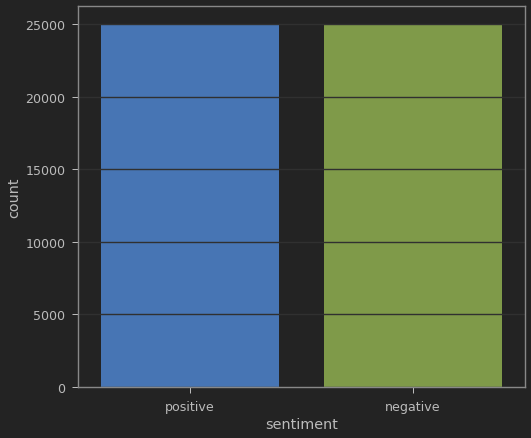

In [8]:
sns.countplot(x="sentiment", data=df)

In [9]:
X, y = df["review"].values, df["sentiment"].values
print(f"Length of reviews: {len(X)}")
print(f"Length of sentiments : {len(y)}")

Length of reviews: 50000
Length of sentiments : 50000


In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

print(f"Length of reviews in training set : {len(Xtrain)}")
print(f"Length of sentiment in test set : {len(ytrain)}")
print("-"*20)
print(f"Length of reviews in test set : {len(Xtest)}")
print(f"Length of sentiment in test set : {len(ytest)}")


Length of reviews in training set : 37500
Length of sentiment in test set : 37500
--------------------
Length of reviews in test set : 12500
Length of sentiment in test set : 12500


In [42]:
tfidf_1gram = TfidfVectorizer(min_df=2, max_df=0.5)
features_train_1gram = tfidf_1gram.fit_transform(Xtrain)
features_test_1gram = tfidf_1gram.transform(Xtest)

logreg1 = LogisticRegression()
logreg1.fit(features_train_1gram, ytrain)

print(f"Score on train set : {logreg1.score(features_train_1gram, ytrain)}")
print(f"Score on test set : {logreg1.score(features_test_1gram, ytest)}")

Score on train set : 0.93232
Score on test set : 0.90016


/home/adityam/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
print(logreg1.coef_)

[[-0.37244863  0.10765406 -0.06343459 ... -0.16277872  0.08062757
  -0.05425371]]


In [46]:
weight_results = pd.DataFrame({"text":tfidf_1gram.get_feature_names(), 
                              "weights":logreg1.coef_.reshape(-1,)})

In [47]:
weight_results = weight_results.sort_values("weights", ascending=False)

In [48]:
# Top positive tokens
weight_results.head(5)

,text,weights
20350,great,8.159076
16324,excellent,7.139725
4807,best,5.826517
34919,perfect,5.338404
52395,wonderful,5.240954


In [49]:
# Top negative tokens
weight_results.tail(5)

,text,weights
5835,boring,-6.761027
51488,waste,-7.395676
3561,awful,-7.765778
3719,bad,-8.418594
52539,worst,-10.701232


In [66]:
# Applying 2-grams 
tfidf_2grams = TfidfVectorizer(min_df=5, max_df=0.5, ngram_range=(1, 2))
features_train_2grams = tfidf_2grams.fit_transform(Xtrain)
features_test_2grams = tfidf_2grams.transform(Xtest)

logreg2 = LogisticRegression(max_iter=200)
logreg2.fit(features_train_2grams, ytrain)

print(f"Score on Training data: {logreg2.score(features_train_2grams, ytrain)}")
print(f"Score on Test data : {logreg2.score(features_test_2grams, ytest)}")

Score on Training data: 0.9532533333333333
Score on Test data : 0.90712


In [67]:
print(logreg2.coef_)

[[-0.22548773  0.02500085 -0.07915368 ...  0.00627797 -0.01129655
  -0.03587127]]


In [68]:
weight_results = pd.DataFrame({"text":tfidf_2grams.get_feature_names(), 
                              "weights":logreg2.coef_.reshape(-1, )})

weight_results = weight_results.sort_values(by="weights", ascending=False)

In [69]:
# Top positive tokens
weight_results.head(5)

,text,weights
75635,great,8.893919
60095,excellent,6.507345
210014,wonderful,5.074373
26222,best,4.822536
137280,perfect,4.757315


In [70]:
# Top negative tokens
weight_results.tail(5)

,text,weights
28831,boring,-6.431874
182392,the worst,-7.056848
21131,awful,-7.120862
210875,worst,-8.614576
21560,bad,-9.754310


In [76]:
test_txt = ["It's well worth watching"]

_features_1gram = tfidf_1gram.transform(test_txt)

print(logreg1.predict(_features_1gram))

['positive']


In [77]:

_features_2gram = tfidf_2grams.transform(test_txt)

print(logreg2.predict(_features_2gram))

['positive']
